# Figure 2 
Data is assumed to be in the folder "../../data/sequencing_runs/" if that is not true change below

## setup

In [1]:
# imports
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from q_dms_ttr_paper.data_processing import trim

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
plt.rcParams["figure.facecolor"] = "white"

In [1]:
# assume this is where the data is change if not true
DATA_PATH = "../../data/sequencing_runs/"

In [3]:
df = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")

### style functions

In [4]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)


def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)


### plotting functions

In [5]:
def plot_pop_avg_traces_all(df, plot_sequence=False, ylim=None, **kwargs):
    fig, ax = plt.subplots(1, 1, **kwargs)
    for i, row in df.iterrows():
        if "label" in row:
            label = row["label"]
        else:
            label = row["rna_name"]
        plt.plot(row["data"], label=label, lw=4)
    #fig.legend(loc="upper left")
    if plot_sequence:
        seq = df.iloc[0]["sequence"]
        ss = df.iloc[0]["structure"]
        x = list(range(len(seq)))
        ax.set_xticks(x)
        ax.set_xticklabels([f"{s}\n{nt}" for s, nt in zip(seq, ss)])
    if ylim is not None:
        ax.set_ylim([0, ylim])
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)

    return fig

## plots

### Figure 2A: 0 and 40 mM Mg2+ with 300 mM NaCoc

In [6]:
# get rows that represent both conditions
# row 1 is 40 mM Mg, row 2 is 0 mM Mg both at 300 mM NaCoc
row1 = df[(df.buffer == 'NaCoc') & (df.mg_conc == 40) & (df.buffer_conc == 300)].iloc[0]
row2 = df[(df.buffer == 'NaCoc') & (df.mg_conc == 0) & (df.buffer_conc == 300)].iloc[0]

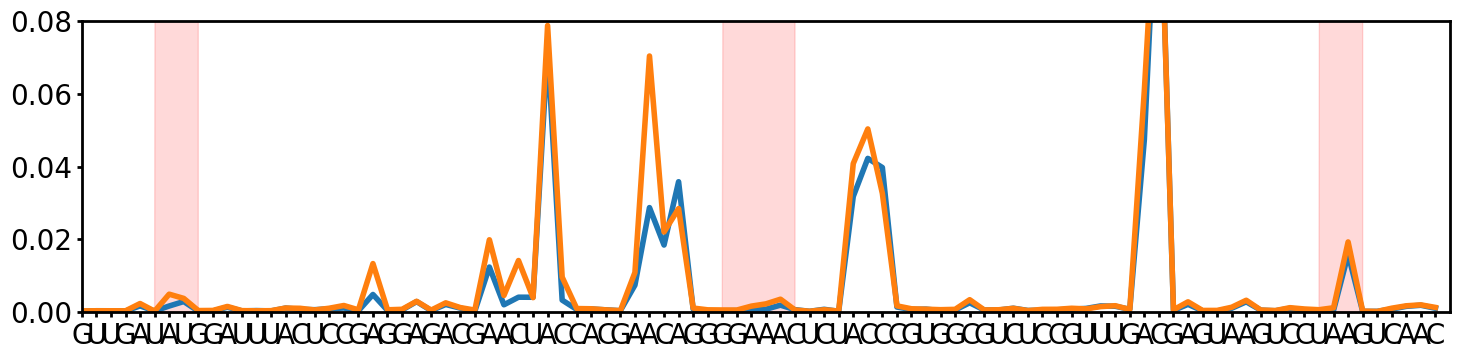

In [7]:
df_sub_1 = pd.DataFrame([row1, row2])
df_sub_1 = trim(df_sub_1, 20, 22)
df_sub_1["label"] = ["40 mM Mg2+", "0 mM Mg2+"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=False, ylim=0.08, figsize=(15, 4));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
plt.xticks([x for x in range(0, len(df_sub_1.iloc[0]["sequence"]), 1)], [x for x in df_sub_1.iloc[0]["sequence"]])
plt.tight_layout()
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([85, 88], [0, 10], color='red', alpha=0.15, zorder=-1)

### Figure 2B: comparision between 300 mM and 50 mM NaCoc with 10 mM Mg2+

In [8]:
row1 = df[(df.buffer == 'NaCoc') & (df.buffer_conc == 300)].iloc[0]
row2 = df[(df.buffer == 'NaCoc') & (df.buffer_conc == 50)].iloc[0]

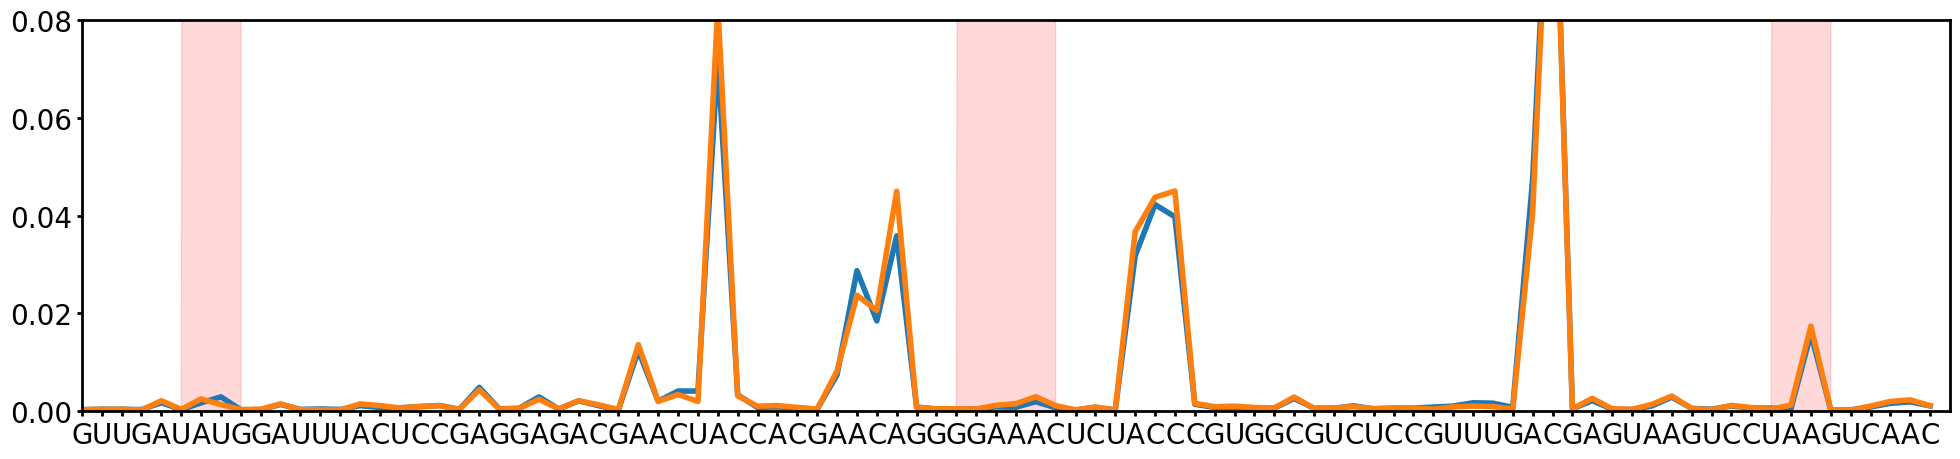

In [9]:
df_sub_1 = pd.DataFrame([row1, row2])
df_sub_1 = trim(df_sub_1, 20, 22)
df_sub_1["label"] = ["300 mM NaCoc", "50 mM NaCoc"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=True, ylim=0.08, figsize=(20, 5));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
plt.xticks([x for x in range(0, len(df_sub_1.iloc[0]["sequence"]), 1)], [x for x in df_sub_1.iloc[0]["sequence"]])
plt.tight_layout()
x = range(0, len(df.iloc[0]["sequence"]))
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([85, 88], [0, 10], color='red', alpha=0.15, zorder=-1)


### Figure 2C: comparision between 300 mM and 50 mM NaCoc by scatter between residue

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


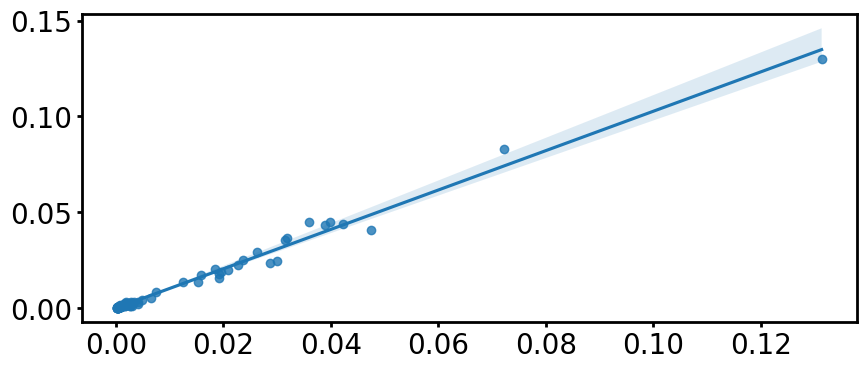

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.regplot(row1['data'], row2['data'], ax=ax)
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)

In [11]:
row1 = df[(df.buffer == 'NaCoc') & (df.mg_conc == 40) & (df.buffer_conc == 50)].iloc[0]
row2 = df[(df.buffer == 'NaCoc') & (df.mg_conc == 0) & (df.buffer_conc == 50)].iloc[0]

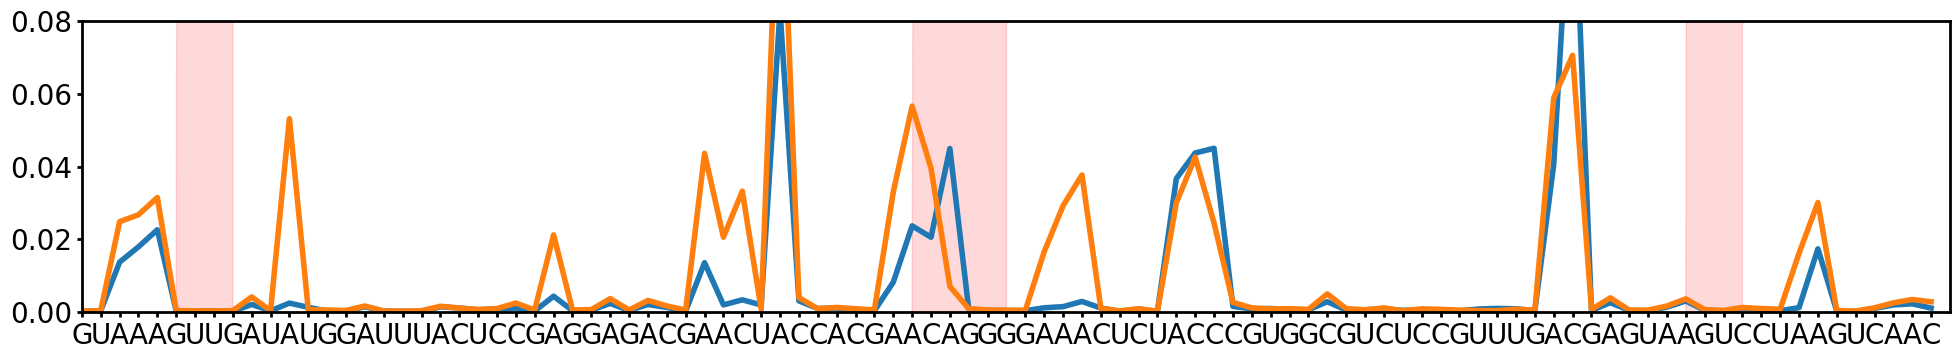

In [12]:
df_sub_1 = pd.DataFrame([row1, row2])
df_sub_1 = trim(df_sub_1, 15, 22)
df_sub_1["label"] = ["40 mM Mg2+", "0 mM Mg2+"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=False, ylim=0.08, figsize=(20, 4));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
plt.xticks([x for x in range(0, len(df_sub_1.iloc[0]["sequence"]), 1)], [x for x in df_sub_1.iloc[0]["sequence"]])
plt.tight_layout()
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([85, 88], [0, 10], color='red', alpha=0.15, zorder=-1)

In [13]:
exp_names = [
    ["2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM", "50"],
    ["2022_07_28_C0117_100mM_NaC_Mg_titra_CM", "100"],
    ["2022_07_29_C0117_150mM_NaC_Mg_titra_CM", "150"],
    ["2022_08_08_C0117_200mM_NaC_Mg_titra_CM", "200"],
    ["2022_08_09_C0117_250mM_NaC_Mg_titra_CM", "250"],
    ["2022_08_10_C0117_300mM_NaC_Mg_titra_CM", "300"],
]

In [14]:
data = [] 
count = 0
for exp in exp_names[::-1]:
    df_sub = df[df["exp_name"] == exp[0]]
    min_row = df_sub[df_sub["mg_conc"] == df_sub["mg_conc"].min()].iloc[0]
    max_row = df_sub[df_sub["mg_conc"] == df_sub["mg_conc"].max()].iloc[0]
    data.append([exp[1], count, min_row["gaaa_avg"], max_row["gaaa_avg"]])
    count += 1
df_sum = pd.DataFrame(data, columns=["mg_conc", "pos", "mg_0_react", "mg_40_react"])

### Figure 2D: magnitude in change of chemical reactivity in TL/TLR between 0 and 40 mM Mg2 at different buffer concentrations

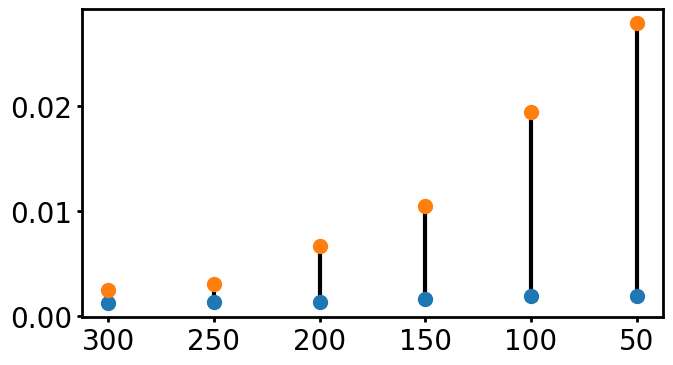

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for i, row in df_sum.iterrows():
    plt.plot([row["pos"], row["pos"]], [row["mg_0_react"], row["mg_40_react"]], color="black", lw=3)
plt.plot(df_sum["pos"], df_sum["mg_40_react"], label="40 mM", marker="o", linestyle=None, lw=0, ms=10);
plt.plot(df_sum["pos"], df_sum["mg_0_react"], label="0 mM", marker="o", linestyle=None, lw=0, ms=10);
plt.xticks(df_sum["pos"], df_sum["mg_conc"])
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
